In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


# sns.set(style="darkgrid")

# # mpl.rcParams['figure.figsize'] = (16, 9)
# mpl.rcParams['figure.figsize'] = (16, 9)
# pd.set_option('display.max_rows', 500)

# %matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [2]:
def quick_plot(x_in, df_input, title, x_label, y_label, y_scale='log', slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
#                         mode="lines+markers",
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        title=title,              
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            ),
        showlegend=True
        )
    fig.update_yaxes(type=y_scale,title=x_label),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 title=y_label,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
#     fig.show()
    return fig
      
    

In [3]:
df_analyse=pd.read_csv('../data/processed/COVID_final_set.csv',sep=';',parse_dates=[0])
df_analyse.sort_values('date',ascending=True)
df_analyse.head()

date    state       country  confirmed  population  \
0 2020-01-22  Alberta        Canada        0.0   37742.154   
1 2020-01-22       no  Korea, South        1.0   51269.185   
2 2020-01-22       no        Kuwait        0.0    4270.571   
3 2020-01-22       no    Kyrgyzstan        0.0    6524.195   
4 2020-01-22       no          Laos        0.0    7275.560   

   confirmed_filtered  confirmed_DR  confirmed_filtered_DR  
0                 0.0           NaN                    NaN  
1                 0.8           NaN                    NaN  
2                 0.0           NaN                    NaN  
3                 0.0           NaN                    NaN  
4                 0.0           NaN                    NaN

In [4]:
country_list = df_analyse['country'].unique().tolist()
len(country_list)

174

In [5]:
d = df_analyse[['date','country','confirmed']].groupby(['country','date']).agg(np.max).unstack(0)
d.columns = d.columns.droplevel()
d.reset_index(level=0, inplace=True)
d.Germany[d.ne(0).idxmax()['Germany']]

1.0

In [6]:
df_analyse.loc[df_analyse['country'] == 'Germany']['population'].tolist()[0]

83783.942

In [7]:
# d['Germany'][35:]
# d.Germany[35:]

In [11]:
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

# for country in country_list:
N0=(df_analyse.loc[df_analyse['country'] == 'Germany']['population'].tolist()[0])*1000 #max susceptible population

# # condition I0+S0+R0=N0
# I0=d.Germany[35]
# S0=N0-I0
# R0=0

# ydata = np.array(d[country][35:])
ydata = np.array(d.Germany[35:])
# ydata = np.array(d.Germany[d.ne(0).idxmax()['Germany']:])
t=np.arange(len(ydata))

I0=ydata[0]
S0=N0-I0
R0=0


print('ydata:', ydata, ' type:', type(ydata), ' shape:', ydata.shape)
print('ydata:', t, ' type:', type(t), ' shape:', t.shape)

ydata: [2.70000e+01 4.60000e+01 4.80000e+01 7.90000e+01 1.30000e+02 1.59000e+02
 1.96000e+02 2.62000e+02 4.82000e+02 6.70000e+02 7.99000e+02 1.04000e+03
 1.17600e+03 1.45700e+03 1.90800e+03 2.07800e+03 3.67500e+03 4.58500e+03
 5.79500e+03 7.27200e+03 9.25700e+03 1.23270e+04 1.53200e+04 1.98480e+04
 2.22130e+04 2.48730e+04 2.90560e+04 3.29860e+04 3.73230e+04 4.39380e+04
 5.08710e+04 5.76950e+04 6.20950e+04 6.68850e+04 7.18080e+04 7.78720e+04
 8.47940e+04 9.11590e+04 9.60920e+04 1.00123e+05 1.03374e+05 1.07663e+05
 1.13296e+05 1.18181e+05 1.22171e+05 1.24908e+05 1.27854e+05 1.30072e+05
 1.31359e+05 1.34753e+05 1.37698e+05 1.41397e+05 1.43342e+05 1.45184e+05
 1.47065e+05 1.48291e+05 1.50648e+05 1.53129e+05 1.54999e+05 1.56513e+05
 1.57770e+05 1.58758e+05 1.59912e+05 1.61539e+05 1.63009e+05 1.64077e+05
 1.64967e+05 1.65664e+05 1.66152e+05 1.67007e+05 1.68162e+05 1.69430e+05
 1.70588e+05 1.71324e+05 1.71879e+05 1.72576e+05 1.73171e+05 1.74098e+05
 1.74478e+05 1.75233e+05 1.75752e+05 1.76369

In [12]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [13]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [14]:
# def SIR_model_t(SIR,t,beta,gamma,N0):
#     ''' Simple SIR model
#         S: susceptible population
#         t: time step, mandatory for integral.odeint
#         I: infected people
#         R: recovered people
#         beta: 
        
#         overall condition is that the sum of changes (differnces) sum up to 0
#         dS+dI+dR=0
#         S+I+R= N (constant size of population)
    
#     '''
    
#     S,I,R=SIR
#     dS_dt=-beta*S*I/N0          #S*I is the 
#     dI_dt=beta*S*I/N0-gamma*I
#     dR_dt=gamma*I
#     return dS_dt,dI_dt,dR_dt

In [15]:
# def fit_odeint(x, beta, gamma, N0, S0, I0, R0):
#     '''
#     helper function for the integration
#     '''
#     return integrate.odeint(SIR_model_t, (S0, I0, R0), x, args=(beta, gamma))[:,1] # we only would like to get dI

In [16]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), x, args=(beta, gamma))[:,1] # we only would like to get dI

In [17]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.70000000e+01, 3.64461822e+01, 4.91971889e+01, 6.64092376e+01,
       8.96430538e+01, 1.21005391e+02, 1.63340053e+02, 2.20485752e+02,
       2.97624161e+02, 4.01749727e+02, 5.42303815e+02, 7.32030669e+02,
       9.88132723e+02, 1.33382994e+03, 1.80046435e+03, 2.43034029e+03,
       3.28055721e+03, 4.42818141e+03, 5.97722348e+03, 8.06805014e+03,
       1.08900768e+04, 1.46988784e+04, 1.98392465e+04, 2.67762392e+04,
       3.61369603e+04, 4.87667126e+04, 6.58043535e+04, 8.87832107e+04,
       1.19765847e+05, 1.61523328e+05, 2.17772441e+05, 2.93487274e+05,
       3.95304355e+05, 5.32041850e+05, 7.15351319e+05, 9.60511106e+05,
       1.28734729e+06, 1.72122078e+06, 2.29393298e+06, 3.04426106e+06,
       4.01762510e+06, 5.26413130e+06, 6.83400856e+06, 8.76946381e+06,
       1.10925654e+07, 1.37902864e+07, 1.68002994e+07, 2.00035594e+07,
       2.32300948e+07, 2.62807891e+07, 2.89608191e+07, 3.11139418e+07,
       3.26458689e+07, 3.35304741e+07, 3.38004473e+07, 3.35291717e+07,
      

In [18]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev=10000)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\tusha\Anaconda3\envs\maxplanckDash\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.0215988  0.02155879]  start infect: 27.0
Optimal parameters: beta = 0.7863039831442958  and gamma =  0.7212655061431756


In [19]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

In [20]:
# df_plot = pd.DataFrame({})
# fig = go.Figure()
print(type(t), type(ydata))
data = {'t':t.tolist(), 'ydata':ydata.tolist(), 'fitted':fitted.tolist()}
df_plot = pd.DataFrame(data)
df_plot.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


t  ydata     fitted
0  0   27.0  27.000000
1  1   46.0  28.814392
2  2   48.0  30.750704
3  3   79.0  32.817128
4  4  130.0  35.022406

In [21]:
fg = quick_plot(df_plot.t,
           df_plot.iloc[:,1:],
           title='Fit of SIR model for Germany cases',
           x_label='Days',
           y_label='Population infected',
           y_scale='log',
           slider=True
           )
fg.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

Optimal parameters: beta = 0.7863039831442958  and gamma =  0.7212655061431756
Basic Reproduction Number R0  1.090172726197459
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


# Dynamic beta in SIR (infection rate)

In [22]:
t_initial=20
t_intro_measures=20
t_hold=135
t_relax=25

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [23]:
pd_beta.shape

(200,)

In [24]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})
for each_beta in pd_beta:
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [25]:
regions = True

# ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
df_plot = pd.DataFrame({'idx':propagation_rates.index, 'simulated infected':propagation_rates.infected})
# quick_plot(df_plot.idx,
#            df_plot.iloc[:,1:],
#            title='Scenario SIR simulations  (demonstration purposes only)',
#            x_label='Time in days',
#            y_label='Population infected',
#            y_scale='log',
#            slider=True
#            )
fg = quick_plot(df_plot.idx,
           df_plot.iloc[:,1:],
           title='Scenario SIR simulations  (demonstration purposes only)',
           x_label='Time in days',
           y_label='Population infected',
           y_scale='log',
           slider=True
           )

# t_initial=20
# t_intro_measures=20
# t_hold=50
# t_relax=110

fg.add_trace(go.Bar(
                    x=np.arange(len(ydata)),
                    y=ydata,
                    width=0.8,
                    name="actual infected",
                    opacity=0.3))
# ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')

if(regions == True):
    fg.update_layout(
        shapes=[
            dict(
                type="rect",
                # x-reference is assigned to the x-values
                xref="x",
                # y-reference is assigned to the plot paper [0,1]
                yref="paper",
                x0=0,
                y0=0,
                x1=0+t_initial,
                y1=1,
                fillcolor="DeepSkyBlue", #"mediumpurple",
                opacity=0.2,
#                 layer="below",
                line_width=0,
                name="Initial"
            ),
            dict(
                type="rect",
                # x-reference is assigned to the x-values
                xref="x",
                # y-reference is assigned to the plot paper [0,1]
                yref="paper",
                x0=t_initial,
                y0=0,
                x1=t_initial+t_intro_measures,
                y1=1,
                fillcolor="DodgerBlue", #"violet",
                opacity=0.2,
#                 layer="below",
                line_width=0,
            ),
            dict(
                type="rect",
                # x-reference is assigned to the x-values
                xref="x",
                # y-reference is assigned to the plot paper [0,1]
                yref="paper",
                x0=t_initial+t_intro_measures,
                y0=0,
                x1=t_initial+t_intro_measures+t_hold,
                y1=1,
                fillcolor="RoyalBlue", #"purple",
                opacity=0.2,
#                 layer="below",
                line_width=0,
            ),
            dict(
                type="rect",
                # x-reference is assigned to the x-values
                xref="x",
                # y-reference is assigned to the plot paper [0,1]
                yref="paper",
                x0=t_initial+t_intro_measures+t_hold,
                y0=0,
                x1=t_initial+t_intro_measures+t_hold+t_relax,
                y1=1,
                fillcolor="DarkBlue", #"darkblue",
                opacity=0.2,
#                 layer="below",
                line_width=0,
            )
        ]
    )
    
# fg.add_trace(go.Heatmap(
#     z=[['t_initial', 't_intro_measures', 't_hold', 't_relax']],
#     colorscale=[
#         [0, 'green'],
#         [0+t_initial, 'green'],
        
#         [t_initial, 'blue'],
#         [t_initial+t_intro_measures, 'blue'],
        
#         [t_initial+t_intro_measures, 'darkblue'],
#         [t_initial+t_intro_measures+t_hold, 'darkblue'],
        
#         [t_initial+t_intro_measures+t_hold, 'violet'],
#         [t_initial+t_intro_measures+t_hold+t_relax, 'violet']
#     ],
#     colorbar=dict(
#         tick0=0,
#         dtick=1
#     )
# ))

fg.show()

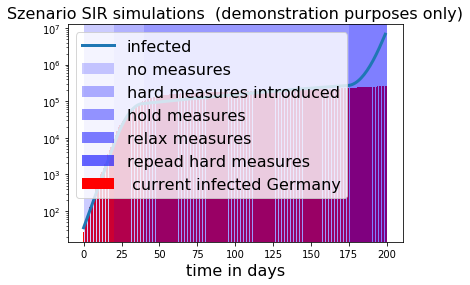

In [27]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

# ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});